In [2]:
from tensorflow.keras.datasets import cifar10

import numpy as np
import pandas as pd

import pickle

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import utils

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, Dropout, MaxPooling2D, GlobalAveragePooling2D, Activation, BatchNormalization
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers

from tensorflow.keras.preprocessing.image import ImageDataGenerator

import matplotlib.pyplot as plt
from PIL import Image

In [3]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

print('Training set shape:', X_train.shape)
print('Test set shape:', X_test.shape)

Training set shape: (50000, 32, 32, 3)
Test set shape: (10000, 32, 32, 3)


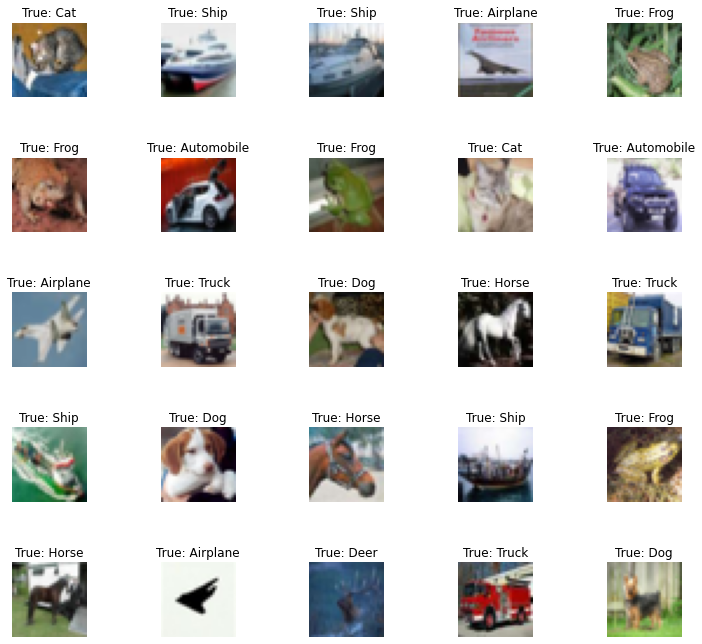

In [6]:
fig, axes = plt.subplots(5, 5, figsize=(12,12))
axes = axes.ravel()

labels = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

for i in np.arange(25):
    axes[i].imshow(X_test[i])
    axes[i].set_title('True: %s' % (labels[y_test.squeeze()[i]]))
    axes[i].axis('off')
    plt.subplots_adjust(wspace=1)

In [3]:
# Normalize
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train / 255.0
X_test = X_test / 255.0

In [5]:
# One hot encoding the label

y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

In [7]:
# Get train and valid set
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)

In [8]:
# To stop the model from overfitting, use the l2 kernel_regularizer and also added dropout layers

def cnn_model():
    
    model = Sequential()
    
    # First Conv layer
    model.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(1e-4), input_shape=(32,32,3)))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.3))
    
    # Second Conv layer
    model.add(Conv2D(filters=256, kernel_size=(3,3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(1e-4)))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.3))
    
    # Third, fourth, fifth convolution layer
    model.add(Conv2D(filters=512, kernel_size=(3,3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(1e-4)))
    model.add(Conv2D(filters=512, kernel_size=(3,3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(1e-4)))
    model.add(Conv2D(filters=256, kernel_size=(3,3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(1e-4)))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.3))

    # Fully Connected layers
    model.add(Flatten())
    
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    
    model.add(Dense(10, activation='softmax'))
    
    model.summary()
    
    return model

In [9]:
datagen = ImageDataGenerator(featurewise_center=False,
                            samplewise_center=False,
                            featurewise_std_normalization=False,
                            samplewise_std_normalization=False,
                            zca_whitening=False,
                            rotation_range=15,
                            width_shift_range=0.1,
                            height_shift_range=0.1,
                            horizontal_flip=True,
                            vertical_flip=False)

datagen.fit(X_train)

In [10]:
model = cnn_model()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 128)       3584      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 128)       0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 128)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 256)       295168    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 256)         0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 8, 8, 256)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 512)         1

In [11]:
model.compile(loss='categorical_crossentropy',
             optimizer=Adam(lr=0.0003, decay=1e-6),
             metrics=['accuracy'])

In [13]:

history = model.fit(datagen.flow(X_train, y_train, batch_size = 64),
                    steps_per_epoch = len(X_train) // 64, 
                    epochs = 125, 
                    validation_data= (X_valid, y_valid),
                    verbose=1)

Epoch 1/125
625/625 [==============================] - 20s 31ms/step - loss: 1.8228 - accuracy: 0.3064 - val_loss: 1.5531 - val_accuracy: 0.4153
Epoch 2/125
625/625 [==============================] - 19s 31ms/step - loss: 1.6016 - accuracy: 0.4081 - val_loss: 1.4189 - val_accuracy: 0.4873
Epoch 3/125
625/625 [==============================] - 19s 31ms/step - loss: 1.4664 - accuracy: 0.4758 - val_loss: 1.2199 - val_accuracy: 0.5604
Epoch 4/125
625/625 [==============================] - 20s 31ms/step - loss: 1.3553 - accuracy: 0.5277 - val_loss: 1.1779 - val_accuracy: 0.5880
Epoch 5/125
625/625 [==============================] - 20s 31ms/step - loss: 1.2763 - accuracy: 0.5640 - val_loss: 1.0865 - val_accuracy: 0.6237
Epoch 6/125
625/625 [==============================] - 32s 52ms/step - loss: 1.2158 - accuracy: 0.5903 - val_loss: 1.0062 - val_accuracy: 0.6538
Epoch 7/125
625/625 [==============================] - 33s 53ms/step - loss: 1.1550 - accuracy: 0.6121 - val_loss: 0.9581 - val_ac

625/625 [==============================] - 18s 29ms/step - loss: 0.5248 - accuracy: 0.8803 - val_loss: 0.6228 - val_accuracy: 0.8563
Epoch 114/125
625/625 [==============================] - 18s 29ms/step - loss: 0.5282 - accuracy: 0.8775 - val_loss: 0.5771 - val_accuracy: 0.8676
Epoch 115/125
625/625 [==============================] - 19s 30ms/step - loss: 0.5224 - accuracy: 0.8817 - val_loss: 0.6210 - val_accuracy: 0.8579
Epoch 116/125
625/625 [==============================] - 19s 30ms/step - loss: 0.5254 - accuracy: 0.8800 - val_loss: 0.6616 - val_accuracy: 0.8474
Epoch 117/125
625/625 [==============================] - 18s 29ms/step - loss: 0.5214 - accuracy: 0.8821 - val_loss: 0.6243 - val_accuracy: 0.8593
Epoch 118/125
625/625 [==============================] - 18s 30ms/step - loss: 0.5249 - accuracy: 0.8815 - val_loss: 0.6213 - val_accuracy: 0.8570
Epoch 119/125
625/625 [==============================] - 19s 30ms/step - loss: 0.5193 - accuracy: 0.8816 - val_loss: 0.6248 - val_ac

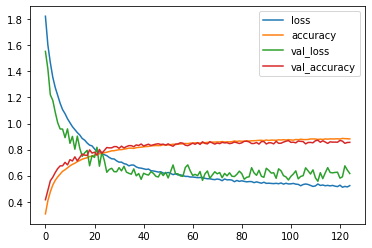

In [14]:
pd.DataFrame(history.history).plot()

In [15]:
scores = model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.6532 - accuracy: 0.8476


In [16]:
pred = model.predict(X_test)

In [17]:
pred.shape

(10000, 10)

In [18]:
labels = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']
y_pred = np.argmax(pred, axis=1)
y_true = np.argmax(y_test, axis=1)
errors = y_pred - y_true != 0

In [21]:
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.82      0.86      1000
           1       0.92      0.95      0.94      1000
           2       0.87      0.76      0.81      1000
           3       0.82      0.59      0.69      1000
           4       0.81      0.86      0.84      1000
           5       0.84      0.74      0.78      1000
           6       0.71      0.97      0.82      1000
           7       0.88      0.91      0.90      1000
           8       0.85      0.96      0.90      1000
           9       0.91      0.92      0.91      1000

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.84     10000
weighted avg       0.85      0.85      0.84     10000



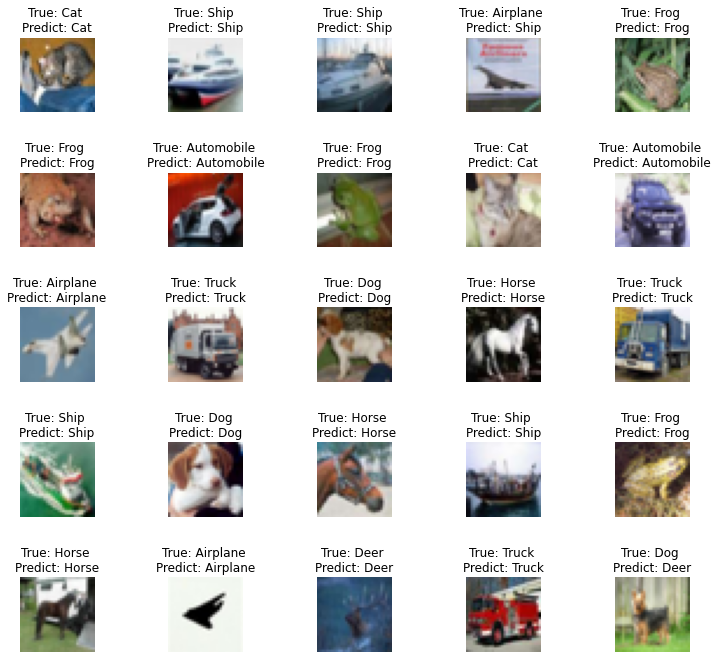

In [22]:
fig, axes = plt.subplots(5, 5, figsize=(12,12))
axes = axes.ravel()

for i in np.arange(25):
    axes[i].imshow(X_test[i])
    axes[i].set_title('True: %s \nPredict: %s' % (labels[y_true[i]], labels[y_pred[i]]))
    axes[i].axis('off')
    plt.subplots_adjust(wspace=1)

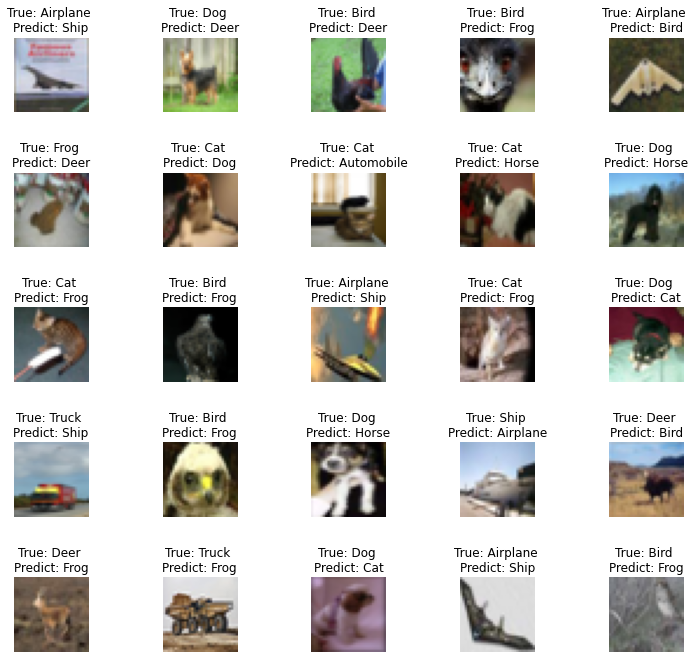

In [23]:
fig, axes = plt.subplots(5, 5, figsize=(12,12))
axes = axes.ravel()

miss_pred = np.where(y_pred != y_true)[0]
for i in np.arange(25):
    axes[i].imshow(X_test[miss_pred[i]])
    axes[i].set_title('True: %s \nPredict: %s' % (labels[y_true[miss_pred[i]]], labels[y_pred[miss_pred[i]]]))
    axes[i].axis('off')
    plt.subplots_adjust(wspace=1)

In [24]:
model.save('cifar10_cnn.h5')